In [ ]:
!git clone https://github.com/qiskit-community/ibm-quantum-challenge-2024.git

Cloning into 'ibm-quantum-challenge-2024'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 461 (delta 232), reused 197 (delta 161), pack-reused 157
Receiving objects: 100% (461/461), 6.19 MiB | 11.10 MiB/s, done.
Resolving deltas: 100% (277/277), done.


In [ ]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-serverless -U
%pip install qiskit-transpiler-service -U
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ebf14bc71ab662826a06af566dca01df90c72d5ad17139413f31648f01ab210a
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 17.5 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-gbceu5_9
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-gbceu5_9
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 96253489893ffda0e53a23ad53ce5e6b992e63d2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00
  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 17.5 MB/s eta 0:00:

In [ ]:
# Import all in one cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import InstructionProperties
from qiskit.visualization import plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.primitives import StatevectorEstimator

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    EstimatorV2 as Estimator,
    SamplerV2 as Sampler,
    EstimatorOptions
)

In [1]:
### Save API Token, if needed

%set_env QXToken=xxxxxxxxxxxxxxx

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=xxxxxxxxxxxxxxx


In [ ]:
# qc-grader should be 0.18.12 (or higher)
import qc_grader

qc_grader.__version__

'0.18.12'

In [ ]:
from qc_grader.challenges.iqc_2024 import (
    grade_lab4_ex1,
    grade_lab4_ex2,
    grade_lab4_ex3,
    grade_lab4_ex4,
    grade_lab4_ex5,
    grade_lab4_ex6,
    grade_lab4_ex7
)

In [ ]:
%pwd
%cd /content/ibm-quantum-challenge-2024/content

/content/ibm-quantum-challenge-2024/content


In [ ]:
%ls -l
%cd lab_4/

total 20
drwxr-xr-x 2 root root 4096 Jun 12 07:15 lab_0/
drwxr-xr-x 2 root root 4096 Jun 12 07:15 lab_1/
drwxr-xr-x 2 root root 4096 Jun 12 07:15 lab_2/
drwxr-xr-x 5 root root 4096 Jun 12 07:15 lab_3/
drwxr-xr-x 2 root root 4096 Jun 12 07:15 lab_4/
/content/ibm-quantum-challenge-2024/content/lab_4


In [ ]:
%ls -l

total 2660
-rw-r--r-- 1 root root    1628 Jun 12 07:15 birds_dataset.csv
-rw-r--r-- 1 root root 2709639 Jun 12 07:15 lab-4.ipynb
-rw-r--r-- 1 root root     208 Jun 12 07:15 opt_params_shallow_VQC.npy
-rw-r--r-- 1 root root     528 Jun 12 07:15 params_0_list.npy


In [ ]:
# Define num_qubits, the number of qubits, for the rest of the Lab
num_qubits = 5

# Load the dictionary
birds_dataset = pd.read_csv('birds_dataset.csv')

# Check if the dataset is loaded correctly - coefficients should be complex numbers
for i in range(2**num_qubits):
    key = 'c%.0f' %i
    birds_dataset[key] = birds_dataset[key].astype(np.complex128)

# Print the dataset
birds_dataset

,names,c0,c1,c2,c3,c4,c5,c6,c7,c8,...,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31
0,Falcon,0.707107+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.707107+0.000000j
1,Hummingbird,0.000000+0.000000j,0.707107+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.707107+0.000000j,0.000000+0.000000j
2,Eagle,0.000000+0.000000j,0.000000+0.000000j,0.707107+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j,0.707107+0.000000j,0.000000+0.000000j,0.000000+0.000000j
3,Osprey,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.707107+0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.707107+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
4,Heron,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.707107+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.707107+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
5,Peacock,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
6,Parrot,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
7,Swan,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
8,Toucan,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
9,Cardinal,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j


In [ ]:
# Definir las aves cuánticas de IBM y no cuánticas de IBM
ibm_quantum_birds = ['Falcon', 'Hummingbird', 'Eagle', 'Osprey', 'Heron']
non_ibm_quantum_birds = ['Peacock', 'Parrot', 'Swan', 'Toucan', 'Cardinal']

# Inicializar las listas de coeficientes y etiquetas
list_coefficients = []
list_labels = []

# Iterar sobre cada fila del dataset
for index, row in birds_dataset.iterrows():
    bird_name = row['names']

    # Recuperar los coeficientes
    coefficients = [row['c%.0f' % i] for i in range(2**num_qubits)]
    list_coefficients.append(coefficients)

    # Asignar la etiqueta correspondiente
    if bird_name in ibm_quantum_birds:
        list_labels.append(1)
    else:
        list_labels.append(0)

# Imprimir las listas para verificar
print(list_coefficients)
print(list_labels)

# Enviar tu respuesta
grade_lab4_ex1(list_coefficients, list_labels)

[[(0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j)], [0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j], [0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j], [0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j], [0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.7071067811865476+0j), 0j, 0j, 0j, 0j], [0j, 0j, 0j, 0j, 0j, (1+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j], [0j, 

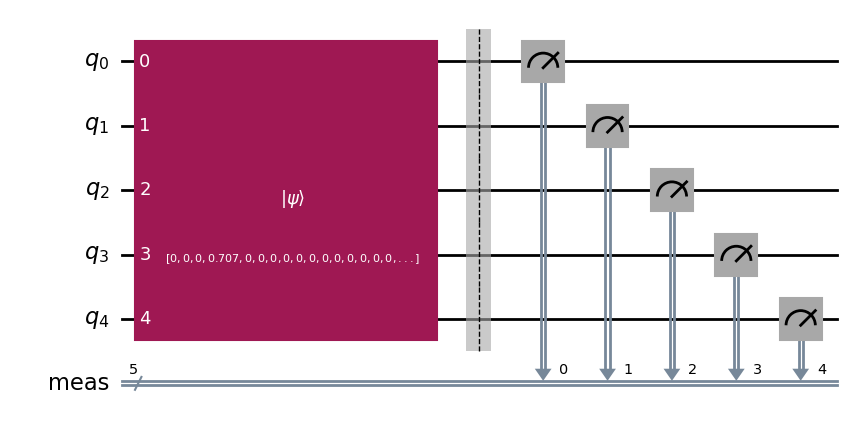

In [ ]:
index_bird = 3 # You can check different birds by changing the index
amplitudes = list_coefficients[index_bird]

# Build the amplitude embedding
qc = QuantumCircuit(5)
qc.initialize(amplitudes, range(num_qubits))
qc.measure_all()

# Draw the amplitude embedding circuit
qc.draw(output="mpl")

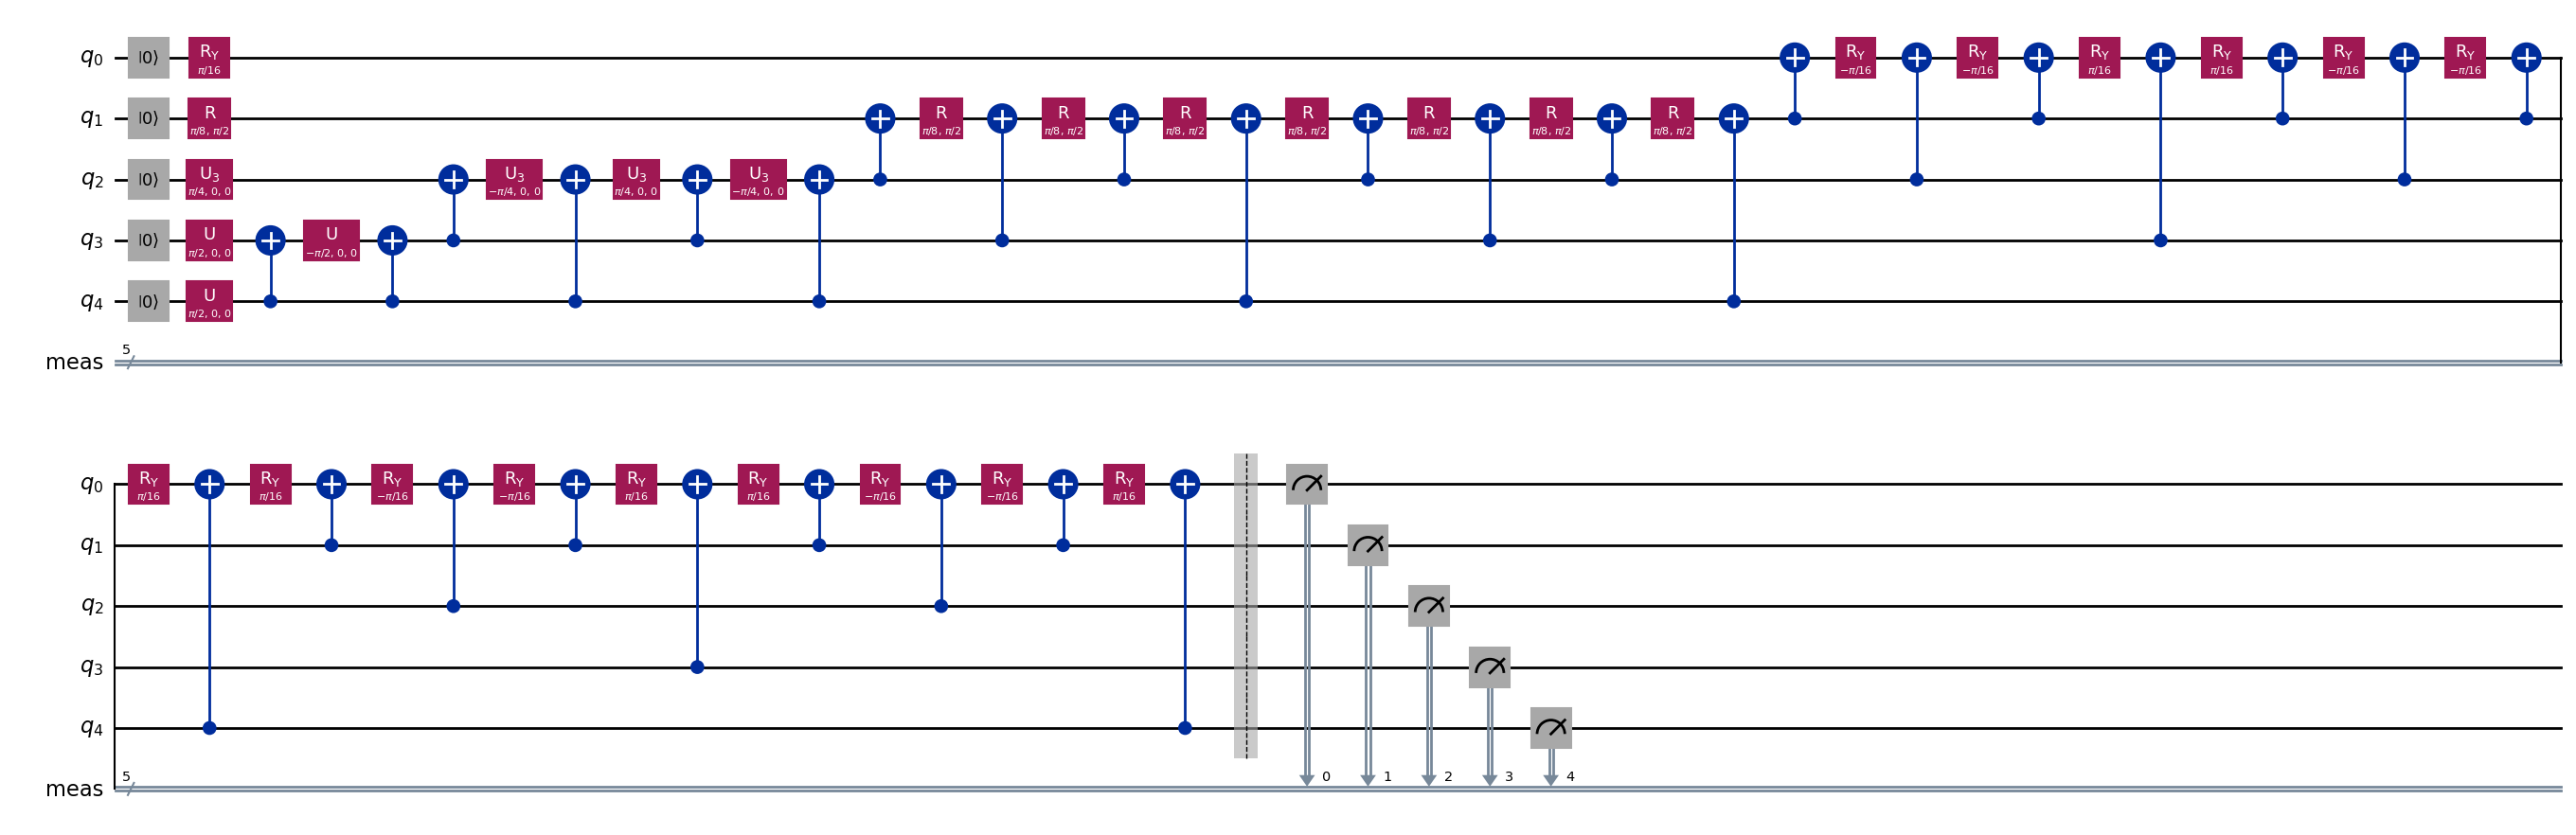

In [ ]:
# Draw the decomposition of the amplitude embedding circuit
qc.decompose(reps=8).draw(output="mpl", fold=40)

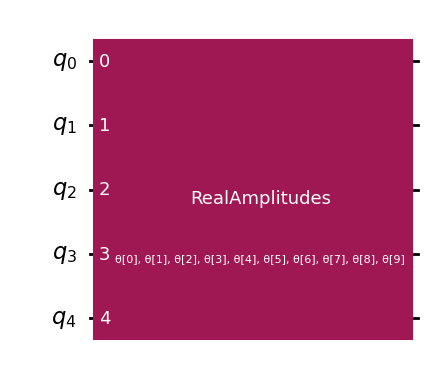

In [ ]:
from qiskit.circuit.library import RealAmplitudes

# Definir el número de qubits
num_qubits = 5

# Definir el número de repeticiones (capas)
reps = 1

# Definir el tipo de entrelazamiento
entanglement = 'full'  # Tipo de entrelazamiento lineal

# Construir el ansatz
ansatz = RealAmplitudes(num_qubits, reps=reps, entanglement=entanglement)

# Dibujar el circuito del ansatz
ansatz.draw(output='mpl')

In [ ]:

grade_lab4_ex2(num_qubits, reps, entanglement)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
# Define the observable
obs = SparsePauliOp("ZZZZZ")

In [ ]:
# Define the estimator and pass manager
estimator = StatevectorEstimator() #To train we use StatevectorEstimator to get the exact simulation
pm = generate_preset_pass_manager(backend=AerSimulator(), optimization_level=3, seed_transpiler=0)

In [ ]:
# Define the cost function
def cost_func(params, list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict):

    """Return cost function for optimization

    Parameters:
        params (ndarray): Array of ansatz parameters
        list_coefficients (list): List of arrays of complex coefficients
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        estimator (EstimatorV2): Statevector estimator primitive instance
        pm (PassManager): Pass manager
        callback_dict (dict): Dictionary to store callback information

    Returns:
        float: Cost function estimate
    """

    cost = 0
    for amplitudes,label in zip(list_coefficients, list_labels):
        qc = QuantumCircuit(num_qubits)
        # Amplitude embedding
        qc.initialize(amplitudes)
        # Compose initial state + ansatz
        classifier = qc.compose(ansatz)
        # Transpile classifier
        transpiled_classifier = pm.run(classifier)
        # Transpile observable
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        # Run estimator
        pub = (transpiled_classifier, transpiled_obs, params)
        job = estimator.run([pub])
        # Get result
        result = job.result()[0].data.evs
        # Compute cost function (cumulative)
        cost += np.abs(result - label)

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(cost)

    # Print the iterations to screen on a single line
    print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict["iters"], cost),
        end="\r",
        flush=True,
    )

    return cost

In [ ]:
# Intialize the lists to store the results from different runs
cost_history_list = []
res_list = []

# Retrieve the initial parameters
params_0_list = np.load("params_0_list.npy")

for it, params_0 in enumerate(params_0_list):

    print('Iteration number: ', it)

    # Initialize a callback dictionary
    callback_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }

    # Minimize the cost function using scipy
    res = minimize(
        cost_func,
        params_0,
        args=(list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict),
        method="cobyla", # Classical optimizer
        options={'maxiter': 200}) # Maximum number of iterations

    # Print the results after convergence
    print(res)

    # Save the results from different runs
    res_list.append(res)
    cost_history_list.append(callback_dict["cost_history"])

Iteration number:  0
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 4.000011467451044
       x: [ 3.517e+00 -8.492e-04  5.588e-04  3.655e+00  4.717e+00
            1.571e+00  1.804e-03  6.281e+00  2.629e+00  3.145e+00]
    nfev: 200
   maxcv: 0.0
Iteration number:  1
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 2.9486038843201667e-08
       x: [-1.309e-07 -1.571e+00  1.571e+00 -1.104e+00  1.934e+00
            1.571e+00  1.571e+00 -2.869e-05  1.571e+00 -2.305e-05]
    nfev: 200
   maxcv: 0.0
Iteration number:  2
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 4.113279744917959
       x: [ 4.050e+00  3.146e+00  3.213e+00  3.439e+00  1.043e+00
            2.321e+00  3.105e+00  3.063e+00  3.192e+00  2.586e+00]
    nfev: 145
   maxcv: 0.0
Iteration number:  3
 message: Maximum number of function evaluations has been exceeded.
 success:

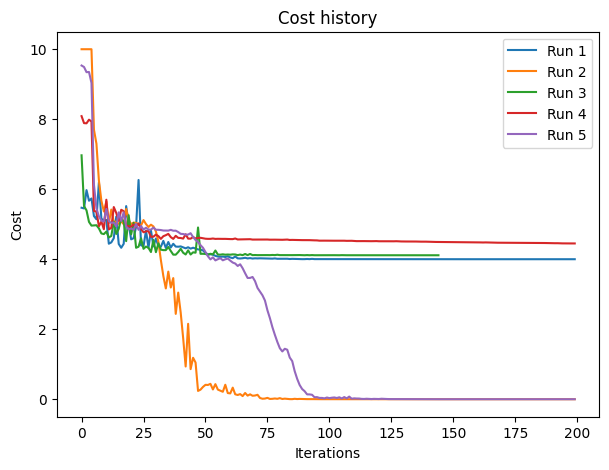

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost history')
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')

# Agregar la historia de costos para cada ejecución
for i, cost_history in enumerate(cost_history_list):
    ax.plot(cost_history, label=f'Run {i+1}')

ax.legend()
plt.show()

In [ ]:
def test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm):
    """Return the performance of the classifier

    Parameters:
        list_coefficients (list): List of arrays of complex coefficients
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        estimator (EstimatorV2): Statevector estimator
        pm (PassManager): Pass manager for transpilation

    Returns:
        list: List of test results
    """
    results_test = []

    for amplitudes, label in zip(list_coefficients, list_labels):
        qc = QuantumCircuit(num_qubits)
        qc.initialize(amplitudes)
        classifier = qc.compose(ansatz)
        transpiled_classifier = pm.run(classifier)
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        job = estimator.run([pub])
        result = job.result()[0].data.evs
        results_test.append(np.abs(result))

    return results_test

def compute_performance(result_list, list_labels):
    """Return the performance of the classifier

    Parameters:
        result_list (list): List of results
        list_labels (list): List of labels

    Returns:
        float: Performance of the classifier
    """
    correct_predictions = 0
    for result, label in zip(result_list, list_labels):
        if (result >= 0.5 and label == 1) or (result < 0.5 and label == 0):
            correct_predictions += 1

    performance = correct_predictions / len(list_labels) * 100
    return performance


Iteration number:  0
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: 4.1258623990240375
       x: [ 3.685e+00 -2.581e-01  1.441e-01  3.712e+00  4.948e+00
            1.571e+00  3.416e-04  5.894e+00  2.457e+00  3.159e+00]
    nfev: 200
   maxcv: 0.0
Iteration number:  1
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 4.6382880227596734e-08
       x: [ 4.451e-05  1.571e+00 -1.571e+00 -5.892e-01  1.275e+00
            1.571e+00  1.571e+00 -1.585e-05  1.571e+00 -1.440e-06]
    nfev: 200
   maxcv: 0.0
Iteration number:  2
 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 4.101265742053378
       x: [ 4.041e+00  3.126e+00  3.204e+00  3.405e+00  1.030e+00
            2.309e+00  3.121e+00  3.060e+00  3.187e+00  2.578e+00]
    nfev: 144
   maxcv: 0.0
Iteration number:  3
 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
 

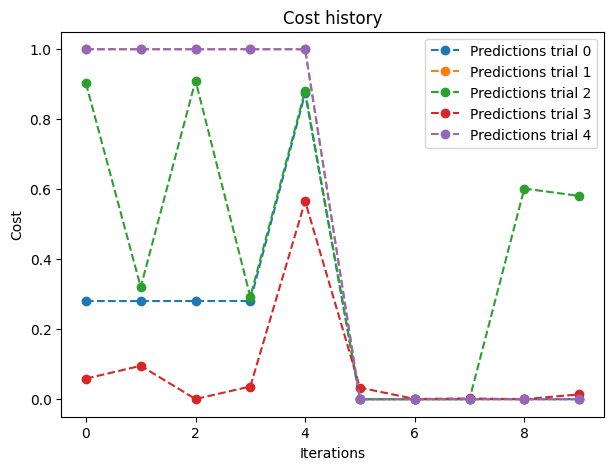

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import StatevectorEstimator

# Cargar los parámetros iniciales
params_0_list = np.load("params_0_list.npy")

# Definir número de qubits
num_qubits = 5

# Definir el ansatz
reps = 1
entanglement = 'full'
ansatz = RealAmplitudes(num_qubits, reps=reps, entanglement=entanglement)

# Definir el observable
obs = SparsePauliOp("ZZZZZ")

# Crear estimador y administrador de pases
estimator = StatevectorEstimator()
pm = generate_preset_pass_manager(optimization_level=3, seed_transpiler=0)

# Lista para almacenar los resultados de las diferentes corridas
cost_history_list = []
res_list = []

for it, params_0 in enumerate(params_0_list):
    print('Iteration number: ', it)

    callback_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }

    res = minimize(
        cost_func,
        params_0,
        args=(list_coefficients, list_labels, ansatz, obs, estimator, pm, callback_dict),
        method="cobyla",
        options={'maxiter': 200}
    )

    print(res)
    res_list.append(res)
    cost_history_list.append(callback_dict["cost_history"])

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost history')
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')

# Agregar el código para evaluar y graficar los resultados

best_performance = 0
best_result_index = -1

for index in range(len(res_list)):
    opt_params = res_list[index].x
    results_test = test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)
    performance = compute_performance(results_test, list_labels)
    print(f"Performance for trial {index}: {performance}")

    if performance > best_performance:
        best_performance = performance
        best_result_index = index

    ax.plot(results_test, 'o--', label='Predictions trial '+str(index))

ax.legend()

# Enviar la respuesta
grade_lab4_ex3(res_list[best_result_index])


In [ ]:
fake_backend = GenericBackendV2(
    num_qubits=5,
    basis_gates=["id", "rz", "sx", "x", "cx"]
  )

In [ ]:
def update_error_rate(backend, error_rates):

    """Updates the error rates of the backend

    Parameters:
        backend (BackendV2): Backend to update
        error_rates (dict): Dictionary of error rates

    Returns:
        None
    """

    default_duration=1e-8
    if "default_duration" in error_rates:
        default_duration = error_rates["default_duration"]

    # Update the 1-qubit gate properties
    for i in range(backend.num_qubits):
        qarg = (i,)
        if "rz_error" in error_rates:
            backend.target.update_instruction_properties('rz', qarg, InstructionProperties(error=error_rates["rz_error"], duration=default_duration))
        if "x_error" in error_rates:
            backend.target.update_instruction_properties('x', qarg, InstructionProperties(error=error_rates["x_error"], duration=default_duration))
        if "sx_error" in error_rates:
            backend.target.update_instruction_properties('sx', qarg, InstructionProperties(error=error_rates["sx_error"], duration=default_duration))
        if "measure_error" in error_rates:
            backend.target.update_instruction_properties('measure', qarg, InstructionProperties(error=error_rates["measure_error"], duration=default_duration))

    # Update the 2-qubit gate properties (CX gate) for all edges in the chosen coupling map
    if "cx_error" in error_rates:
        for edge in backend.coupling_map:
            backend.target.update_instruction_properties('cx', tuple(edge), InstructionProperties(error=error_rates["cx_error"], duration=default_duration))

In [ ]:
error_rates = {
  "default_duration": 1e-8,
  "rz_error": 1e-8,
  "x_error": 1e-8,
  "sx_error": 1e-8,
  "measure_error": 1e-8,
  "cx_error": 1e-8
}

update_error_rate(fake_backend, error_rates)

Performance for run 4: 50.0
Performance for run 4: 50.0
Performance for run 4: 100.0
Performance for run 4: 100.0


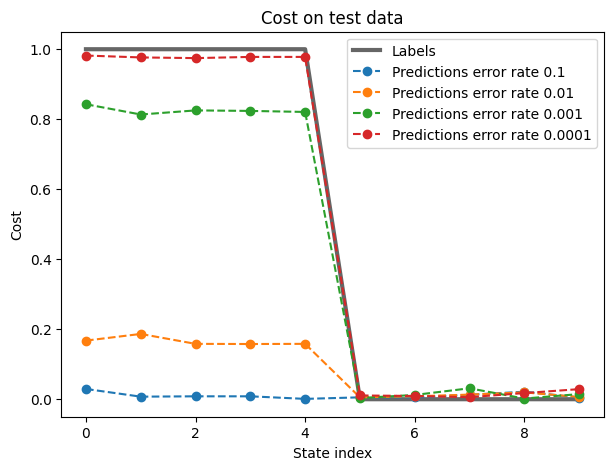

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')

error_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]

fake_backend = GenericBackendV2(
    num_qubits=5,
    basis_gates=["id", "rz", "sx", "x", "cx"]
)

for error_rate_value in error_rate_list:
    update_error_rate(fake_backend, error_rates={"default_duration": 1e-8, "rz_error": error_rate_value, "x_error": 1e-8, "sx_error": 1e-8, "measure_error": 1e-8, "cx_error": error_rate_value})

    estimator = Estimator(backend=fake_backend)
    pm = generate_preset_pass_manager(backend=fake_backend, optimization_level=1, seed_transpiler=0)

    opt_params = res_list[best_result_index].x
    results_test = test_VQC(list_coefficients, list_labels, ansatz, obs, opt_params, estimator, pm)

    print(f"Performance for run {index}: {compute_performance(results_test, list_labels)}")
    ax.plot(results_test, 'o--', label='Predictions error rate '+str(error_rate_value))

ax.legend()

In [ ]:
# Submit your answer using following code
grade_lab4_ex4(fake_backend) # Expected answer type: BackendV2

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="xxxxxxxxxxxxxxxxx",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_osaka")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

ModuleNotFoundError: No module named 'qiskit_ibm_runtime'

Depth of two-qubit gates:  41


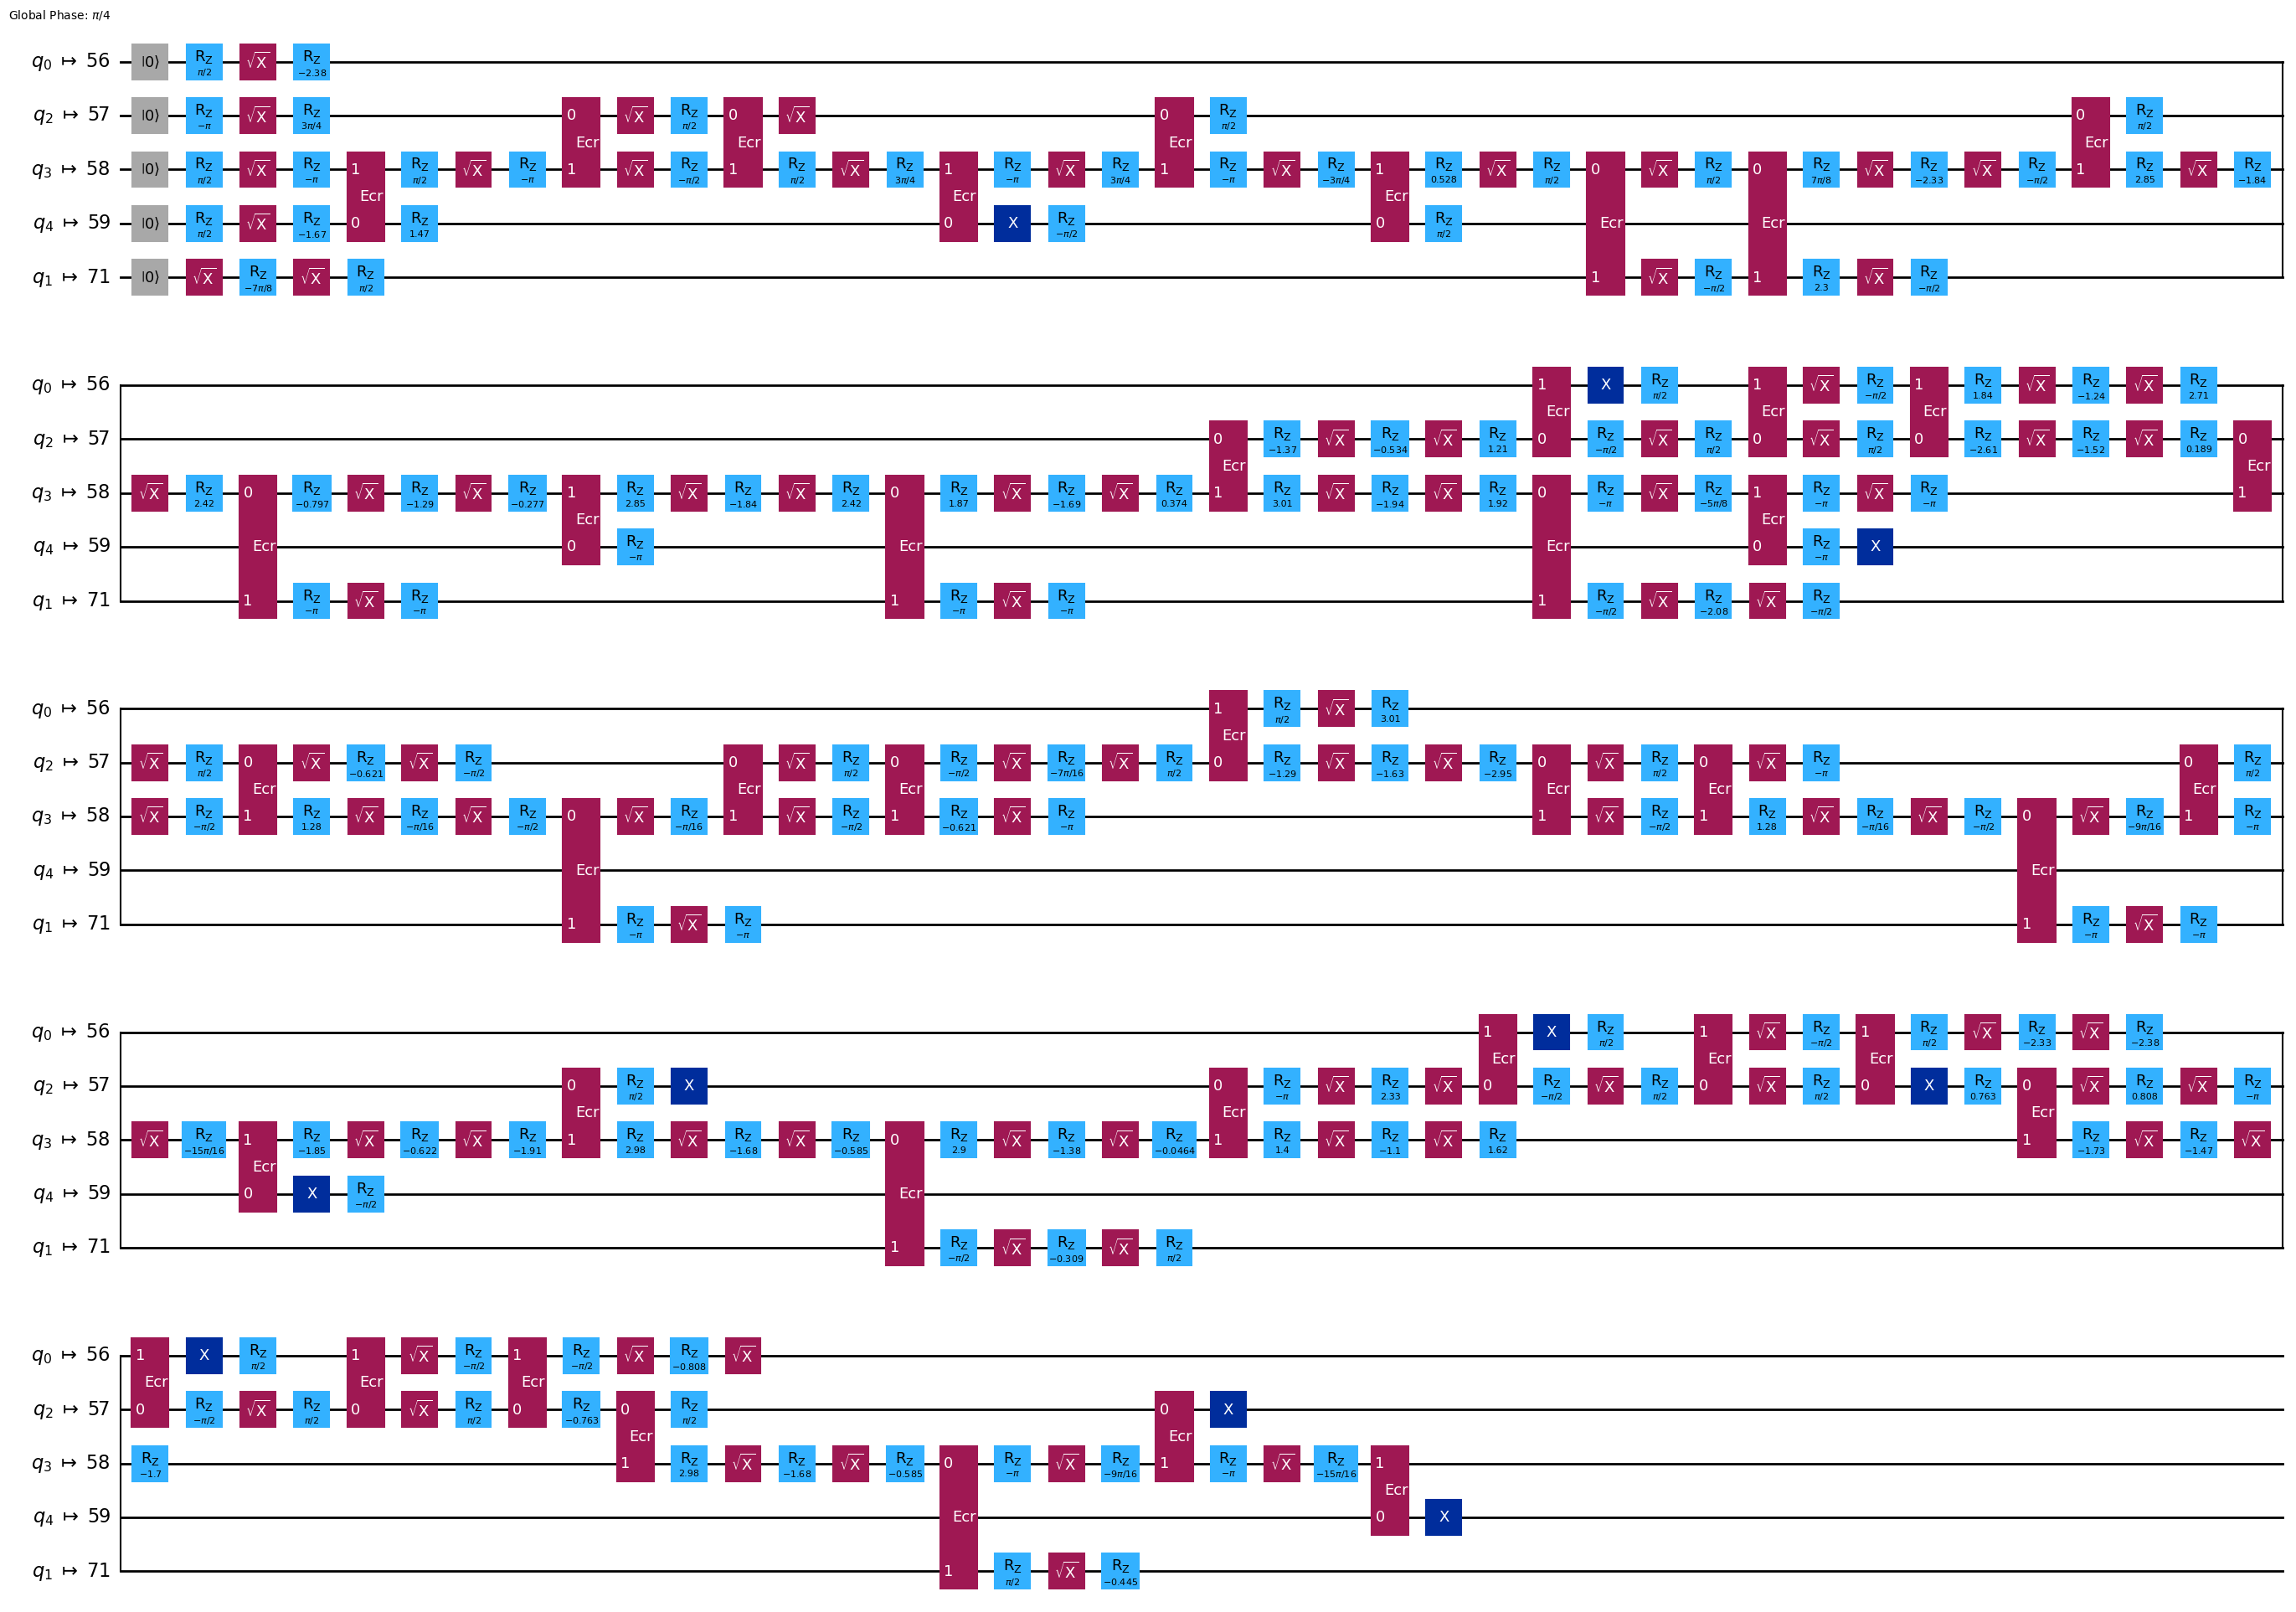

In [ ]:
index_bird = 0 #you can check different birds by changing the index
qc = QuantumCircuit(num_qubits)
qc.initialize(list_coefficients[index_bird])
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", idle_wires=False, fold=40)

In [ ]:
def amplitude_embedding(num_qubits, bird_index):
    """Create amplitude embedding circuit

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """

    # Helper function to generate GHZ state
    def generate_GHZ(qc):
        qc.h(0)
        for i in range(num_qubits - 1):
            qc.cx(i, i + 1)

    qc = QuantumCircuit(num_qubits)

    # IBM Quantum Birds (0-4)
    if bird_index < 5:
        generate_GHZ(qc)

    # Flip qubits according to the binary representation of bird_index
    bit_str = format(bird_index, "0{}b".format(num_qubits))
    for i in reversed(range(len(bit_str))):
        if bit_str[i] == '1':
            qc.x(num_qubits - 1 - i)  # Adjust qubit index to match the quantum circuit

    return qc


In [ ]:
# Test the amplitude_embedding function
index_bird = 0 # You can check different birds by changing the index
#num_qubits = 5

# Build the amplitude embedding
qc = amplitude_embedding(num_qubits, index_bird)
qc.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc)

# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit]).result()
samp_dist = result[0].data.meas.get_counts()
plot_distribution(samp_dist, figsize=(15, 5))

# Check the depth of the new amplitude embedding circuit
qc = amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

# Submit your answer
grade_lab4_ex5(amplitude_embedding) # Expected answer type Callable


Depth of two-qubit gates:  4
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
# Submit your answer using following code
grade_lab4_ex5(amplitude_embedding) # Expected answer type Callable

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Depth of two-qubit gates:  18


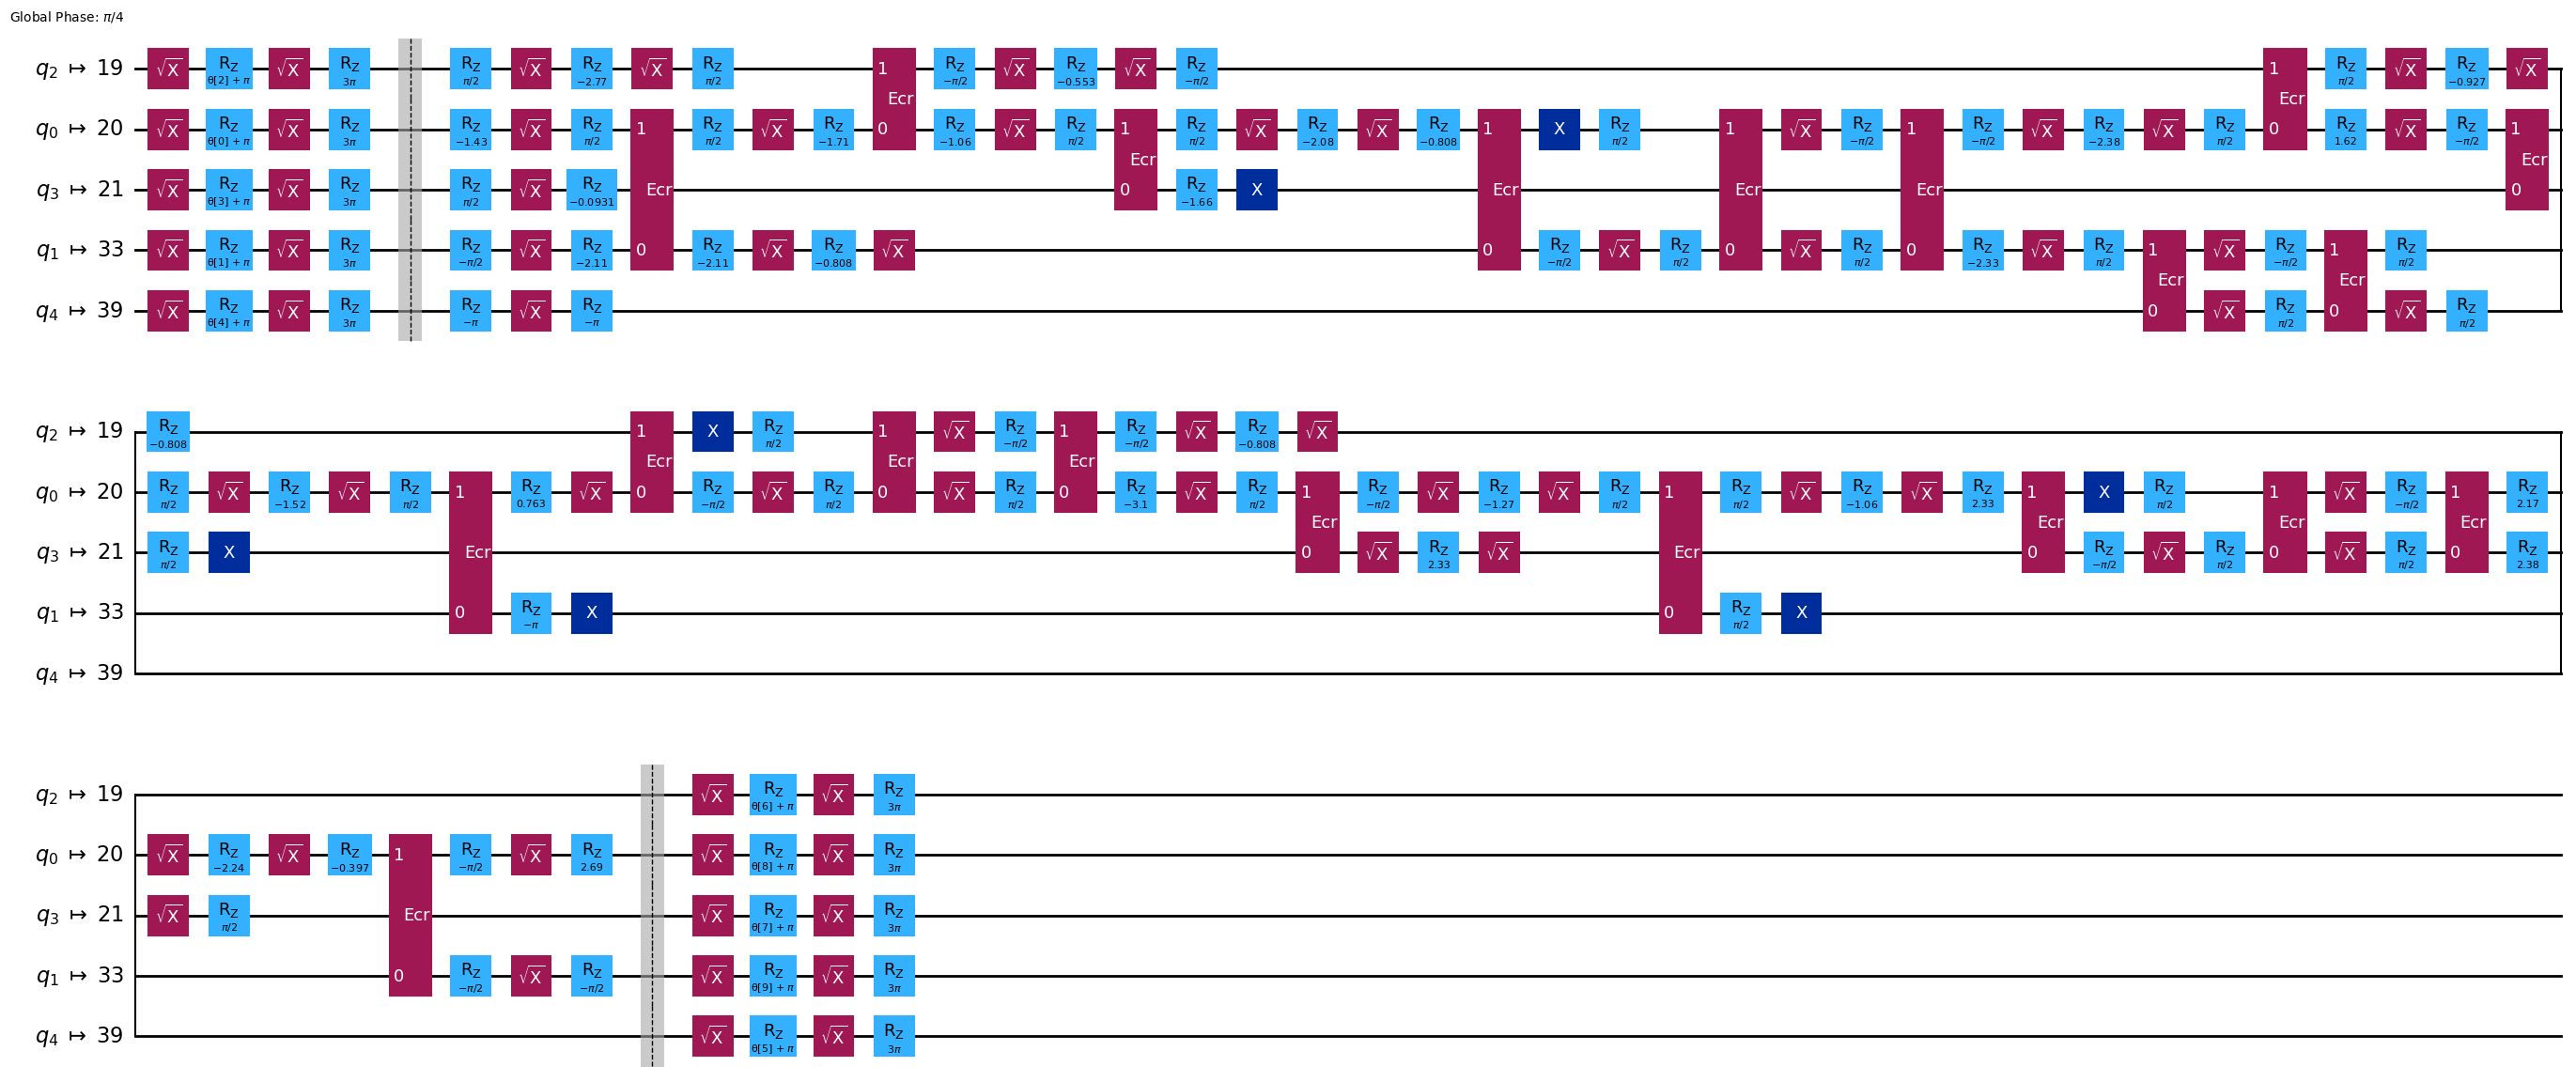

In [ ]:
old_ansatz = RealAmplitudes(num_qubits, reps=1, entanglement='full', insert_barriers=True)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_ansatz = pm.run(old_ansatz)

print('Depth of two-qubit gates: ', transpiled_ansatz.depth(lambda x: len(x.qubits) == 2))
transpiled_ansatz.draw(output="mpl", idle_wires=False, fold=40)

Depth of two-qubit gates (pairwise):  4


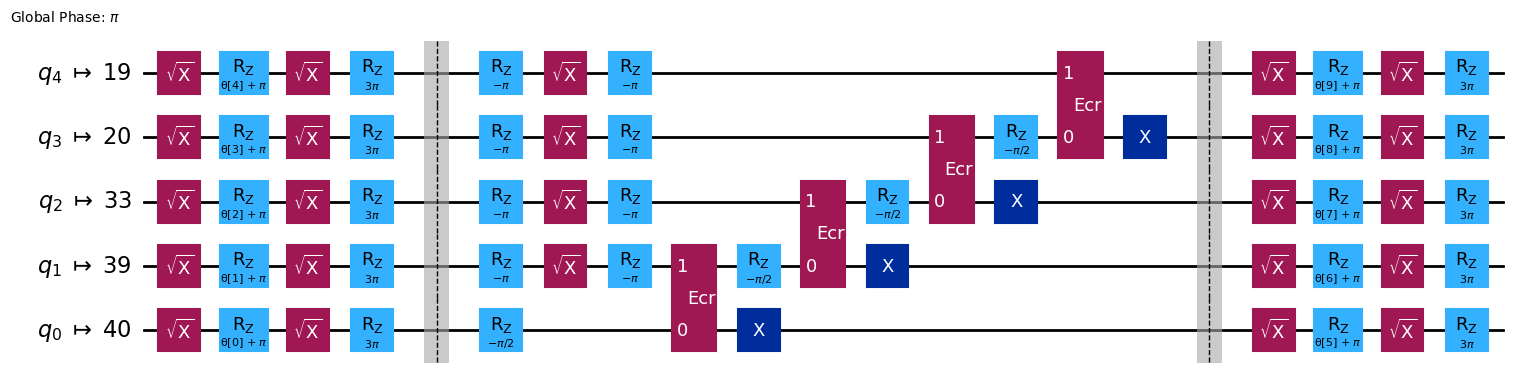

In [ ]:
# Initialize RealAmplitudes with pairwise connectivity
ansatz = RealAmplitudes(num_qubits, reps=1, entanglement='linear', insert_barriers=True)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_ansatz = pm.run(ansatz)

print('Depth of two-qubit gates (pairwise): ', transpiled_ansatz.depth(lambda x: len(x.qubits) == 2))
transpiled_ansatz.draw(output="mpl", fold=False, idle_wires=False)

In [ ]:
old_mapping = QuantumCircuit(num_qubits)
old_mapping.initialize(list_coefficients[index_bird])
old_classifier = old_mapping.compose(old_ansatz)

new_mapping = amplitude_embedding(num_qubits, index_bird)
new_classifier = new_mapping.compose(ansatz)

pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
old_transpiled_classifier = pm.run(old_classifier)
new_transpiled_classifier = pm.run(new_classifier)

print('Old depth of two-qubit gates: ', old_transpiled_classifier.depth(lambda x: len(x.qubits) == 2))
print('Current depth of two-qubit gates: ', new_transpiled_classifier.depth(lambda x: len(x.qubits) == 2))

Old depth of two-qubit gates:  66
Current depth of two-qubit gates:  8


Performance: 20.0
Submitting your answer. Please wait...
Performance: 99.12% > 70%
Congratulations! 🎉 Your answer is correct.


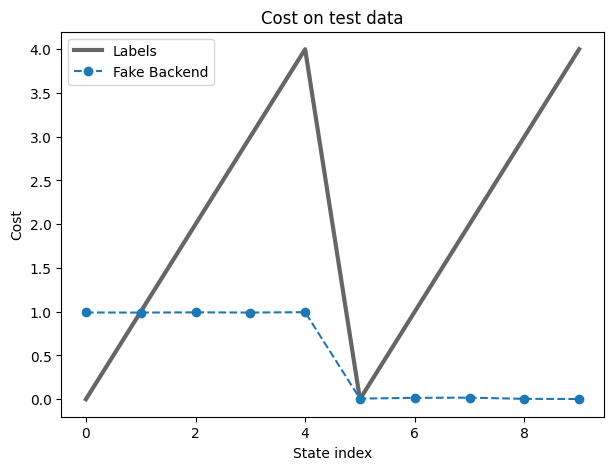

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import Estimator

def test_shallow_VQC(list_labels, ansatz, obs, opt_params, estimator, pm):
    """Return the performance of the classifier

    Parameters:
        list_labels (list): List of labels
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        obs (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        estimator (Estimator): Statevector estimator
        pm (PassManager): Pass manager for transpilation

    Returns:
        results_test (list): List of test results
    """
    results_test = []

    for index in range(len(list_labels)):
        qc = amplitude_embedding(num_qubits, index)
        classifier = qc.compose(ansatz)
        transpiled_classifier = pm.run(classifier)
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        job = estimator.run([pub])
        result = job.result()[0].data.evs
        results_test.append(np.abs(result))

    return results_test

# Definición de la función de embedding de amplitud
def amplitude_embedding(num_qubits, bird_index):
    qc = QuantumCircuit(num_qubits)

    # IBM Quantum Birds (0-4)
    if bird_index < 5:
        qc.h(0)
        for i in range(num_qubits - 1):
            qc.cx(i, i + 1)

    # Flip qubits according to the binary representation of bird_index
    bit_str = format(bird_index, "0{}b".format(num_qubits))
    for i in reversed(range(len(bit_str))):
        if bit_str[i] == '1':
            qc.x(num_qubits - 1 - i)

    return qc

# Cargar los parámetros óptimos entrenados previamente
opt_params = np.load('opt_params_shallow_VQC.npy')

# Definir el estimador y el pass manager
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)

# Obtener las etiquetas de las aves (lista de índices)
list_labels = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]  # Ejemplo de etiquetas

# Definir el ansatz
num_qubits = 5
reps = 1
entanglement = 'linear'
ansatz = RealAmplitudes(num_qubits, reps=reps, entanglement=entanglement)

# Definir el observable
obs = SparsePauliOp("ZZZZZ")

# Evaluar el rendimiento del VQC con el backend falso
results_test = test_shallow_VQC(list_labels, ansatz, obs, opt_params, estimator, pm)
print(f"Performance: {compute_performance(results_test, list_labels)}")

# Graficar los resultados
fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
ax.plot(list_labels, 'k-', linewidth=3, alpha=0.6, label='Labels')
ax.plot(results_test, 'o--', label='Fake Backend')
ax.legend()

In [ ]:
# Enviar la respuesta
grade_lab4_ex6(results_test)

Submitting your answer. Please wait...
Performance: 99.12% > 70%
Congratulations! 🎉 Your answer is correct.


In [ ]:
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, EstimatorOptions

def test_shallow_VQC_QPU(list_labels, ansatz, obs, opt_params, options, backend):
    """
    Return the performance of the classifier.

    Parameters:
    list_labels (list): List of labels
    ansatz (QuantumCircuit): Parameterized ansatz circuit
    obs (SparsePauliOp): Observable
    opt_params (ndarray): Array of optimized parameters
    options (EstimatorOptions): Estimator options
    backend (service.backend): Backend to run the job

    Returns:
    job_id (str): Job ID
    """
    estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

    pubs = []
    for bird, label in enumerate(list_labels):
        ## Write your code below here ##
        pub = (ansatz, obs, opt_params)
        pubs.append(pub)
        ## Write your code above here ##

    job = estimator.run(pubs)
    job_id = job.job_id()
    print(f"Job ID: {job_id}")
    print(f"Status: {job.status()}")

    return job_id

In [ ]:
#No DD, no TREX (no ZNE)
options_0 = EstimatorOptions(default_shots=5000,
                            optimization_level=0,
                            resilience_level = 0,
                            twirling={"enable_measure":False},
                            dynamical_decoupling={"enable":False, "sequence_type":"XpXm"})



#DD + TREX (no ZNE)
options_1 = EstimatorOptions(default_shots=5000,
                        twirling={"enable_measure":True},
                        optimization_level=0,
                        resilience_level = 1,
                        dynamical_decoupling={"enable":True,"sequence_type":"XpXm"})

In [ ]:
# Submit your answer using following code
grade_lab4_ex7(options_0, options_1) # Expected answer type: EstimatorOptions, EstimatorOptions

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
